# IMPORTS AND LOAD DATASET

In [7]:
#This are the most common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
%matplotlib inline

In [6]:
#Read the file, if you are in Google Colab use the command : 
from google.colab import files
file1 = files.upload()
SBH = pd.read_csv('data/serviciosbomberoshmo_ready.csv', encoding="latin1")

ImportError: No module named 'google'

In [0]:
sbh = SBH.copy()

In [4]:
sbh.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0


In [5]:
sbh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22996 entries, 0 to 22995
Data columns (total 9 columns):
FOLIO       22996 non-null object
TIPO        22989 non-null object
LUGAR       22974 non-null object
FECHA       22996 non-null object
SALIDA      22996 non-null object
LLEGADA     22869 non-null object
CAUSA       22740 non-null object
COLONIA     22560 non-null object
ESTACION    22995 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.6+ MB


In [0]:
#Hacer todas las letras del dataframe mayusculas
sbh = sbh.applymap(lambda s:s.upper() if type(s) == str else s)

In [0]:
#sbh_incendios = sbh[(sbh['TIPO'] ==12) & (sbh['TIPO']<=19)]

#Commando para saber si en un elemento del dataframe(df) de cierta columna(b) se encuentra la palabra x ('EQUITY')
#Regresa un valor falso o verdadero
#df['b'].str.contains(r'EQUITY')

# EJERCICIO 1. COLONIAS CON MAS INCENDIOS
 Colonia con más incendios

In [8]:
#Prueba de la funcion con dataframe de servicio de bomberos de Hermosillo
sbh['TIPO'].str.contains(r'INCENDIO').sum()

13466

In [0]:
#Reasigno la variable sbh_incendios en un nuevo dataframe que solo contenga los renglones donde el TIPO contenga la palabra incendio (ojo, la palabra puede estar en cualquier parte del string)
sbh_incendios = sbh[(sbh['TIPO'].str.contains(r'INCENDIO') == True)]

In [10]:
#Verificamos, originalmente todo los datos eran 22996 y ahora son 13466
sbh_incendios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 9 columns):
FOLIO       13466 non-null object
TIPO        13466 non-null object
LUGAR       13457 non-null object
FECHA       13466 non-null object
SALIDA      13466 non-null object
LLEGADA     13398 non-null object
CAUSA       13398 non-null object
COLONIA     13200 non-null object
ESTACION    13465 non-null float64
dtypes: float64(1), object(8)
memory usage: 1.0+ MB


In [11]:
sbh_incendios.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS'),
 Text(0, 0, 'PALO VERDE'),
 Text(0, 0, 'LOS OLIVOS'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'SAN LUIS')]

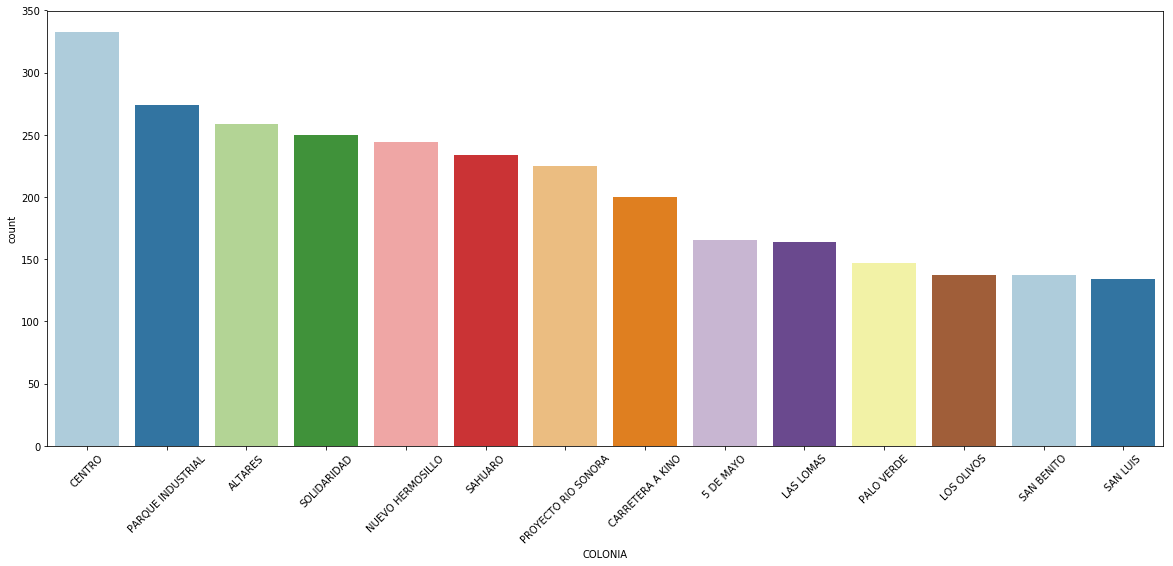

In [12]:
#Graficamos 
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:15].index, palette = 'Paired') 
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=45)


# EJERCICIO 2 Top 10 Colonias Histograma por mes




In [14]:
#Obtenemos dia, mes y año de la columna de FECHA del dataframe
sbh_incendios['YEAR'] = pd.DatetimeIndex(sbh_incendios['FECHA']).year
sbh_incendios['MONTH'] = pd.DatetimeIndex(sbh_incendios['FECHA']).month
sbh_incendios['DAY'] = pd.DatetimeIndex(sbh_incendios['FECHA']).day

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [15]:
sbh_incendios.drop('FECHA', axis = 1).head()

,FOLIO,TIPO,LUGAR,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS')]

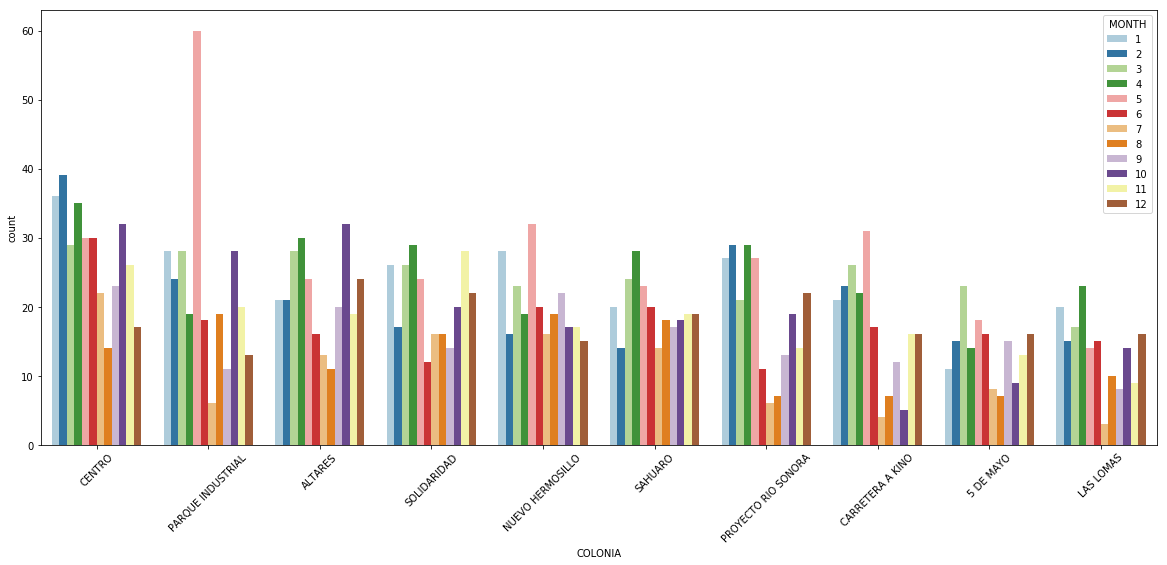

In [16]:
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g1 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:11].index, palette = 'Paired', hue= 'MONTH') 
loc, labels = plt.xticks()
g1.set_xticklabels(labels, rotation=45)

# EJERCICIO 3 INCENDIOS POR CAUSA

In [17]:
#Cuantas Causas hay
len(sbh_incendios['CAUSA'].unique())

32

[Text(0, 0, 'FUEGO DIRECTO'),
 Text(0, 0, 'CORTO CIRCUITO'),
 Text(0, 0, 'OTROS'),
 Text(0, 0, 'SOBRECALENTAMIENTO'),
 Text(0, 0, 'INCENDIO DE ZACATE Y BASURA'),
 Text(0, 0, 'FUGA DE COMBUSTIBLE'),
 Text(0, 0, 'SOBREPRESION'),
 Text(0, 0, 'FUGA DE GAS LP Y/O GAS NATURAL'),
 Text(0, 0, 'FUGA DE GAS'),
 Text(0, 0, 'SOBRECARGA')]

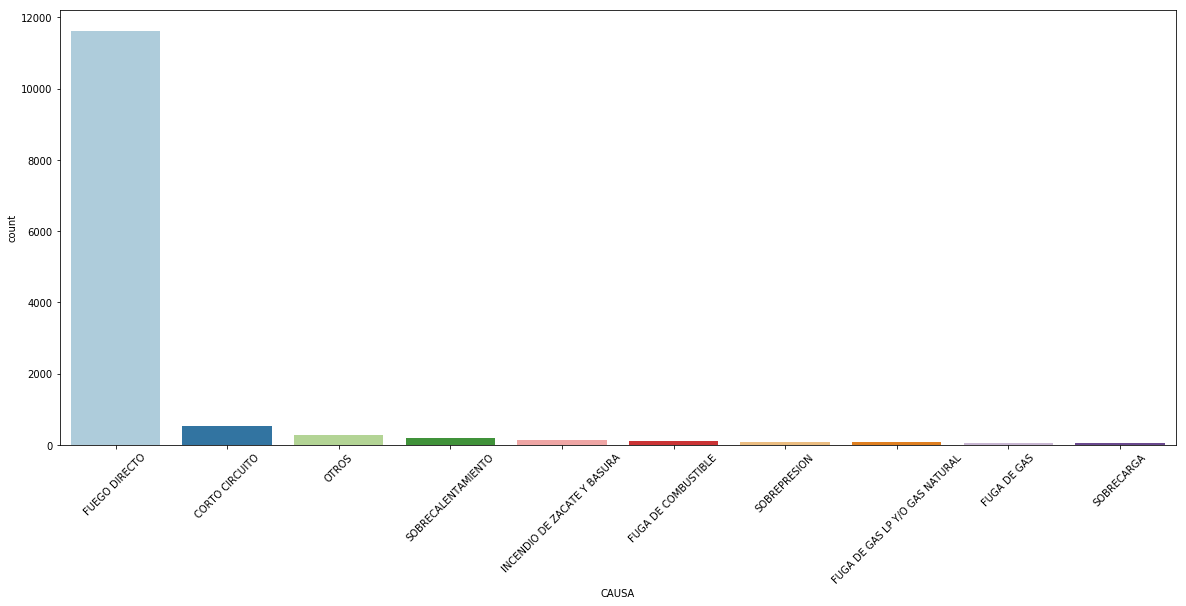

In [18]:
# En esta primera grafica se comparan las causas con todo el dataset de incendios
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
#g2 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:11].index, palette = 'Paired', hue='CAUSA') 
g2 = sns.countplot(x='CAUSA', data = sbh_incendios, order = pd.value_counts(sbh_incendios['CAUSA']).iloc[:10].index, palette = 'Paired') 
loc, labels = plt.xticks()
g2.set_xticklabels(labels, rotation=45)

In [20]:
#Con este comando hago una variable tipo lista donde estan todas las causas a partir del index 7
#Es decir, .value_counts genera una dataframe ordenada de mayor a menor con todas las veces que un string se repite en la columna de CAUSA

sbh_incendios_causas_list = sbh_incendios['CAUSA'].value_counts().iloc[7:].index
sbh_incendios_causas_list


Index(['FUGA DE GAS LP Y/O GAS NATURAL', 'FUGA DE GAS', 'SOBRECARGA',
       'FALSA ALARMA', 'CHOQUE', 'ENJAMBRE DE ABEJAS',
       'MAL ESTADO DEL CILINDRO Y/O VALVULAS', 'INCENDIO DE CASA DE MATERIAL',
       'INCENDIO DE VEHÍCULO', 'CONATO DE INCENDIO', 'FALSA EXPLOSIÓN',
       'DERRAME DE COMBUSTIBLE', 'COBERTURA DE SEGURIDAD',
       'INCENDIO DE CASA DE CARTÓN', 'FENOMENO NATURAL', 'REMOJAR',
       'EXPLOSIONES', 'VOLCAMIENTO', 'INCENDIO DE INSTALACIÓN PÚBLICA',
       'INCENDIO DE COMERCIO', 'RETIRO DE ANIMAL', 'DERRUMBE',
       'INCIDENTE CON MATERIAL PELIGROSO', 'RESCATE'],
      dtype='object')

In [0]:
sbh_incendios_causas = sbh_incendios

In [22]:
sbh_causas = sbh_incendios['CAUSA'].value_counts()
sbh_causas

FUEGO DIRECTO                           11626
CORTO CIRCUITO                            523
OTROS                                     272
SOBRECALENTAMIENTO                        200
INCENDIO DE ZACATE Y BASURA               150
FUGA DE COMBUSTIBLE                       121
SOBREPRESION                               94
FUGA DE GAS LP Y/O GAS NATURAL             73
FUGA DE GAS                                61
SOBRECARGA                                 56
FALSA ALARMA                               50
CHOQUE                                     27
ENJAMBRE DE ABEJAS                         22
MAL ESTADO DEL CILINDRO Y/O VALVULAS       15
INCENDIO DE CASA DE MATERIAL               15
INCENDIO DE VEHÍCULO                       13
CONATO DE INCENDIO                         12
FALSA EXPLOSIÓN                            11
DERRAME DE COMBUSTIBLE                     11
COBERTURA DE SEGURIDAD                      8
INCENDIO DE CASA DE CARTÓN                  7
FENOMENO NATURAL                  

In [0]:
#Elimino tododos los elementos que anteriormente estableci en la variable sbh_incendios_causas_list, dejando solamente los primeros 7 con mayor cantidad de casos
sbh_incendios_causas = sbh_incendios_causas.drop(sbh_incendios_causas[sbh_incendios_causas['CAUSA'].isin(sbh_incendios_causas_list)].index)

In [26]:
sbh_incendios_causas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13054 entries, 0 to 22995
Data columns (total 12 columns):
FOLIO       13054 non-null object
TIPO        13054 non-null object
LUGAR       13045 non-null object
FECHA       13054 non-null object
SALIDA      13054 non-null object
LLEGADA     12990 non-null object
CAUSA       12986 non-null object
COLONIA     12797 non-null object
ESTACION    13053 non-null float64
YEAR        13054 non-null int64
MONTH       13054 non-null int64
DAY         13054 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 1.3+ MB


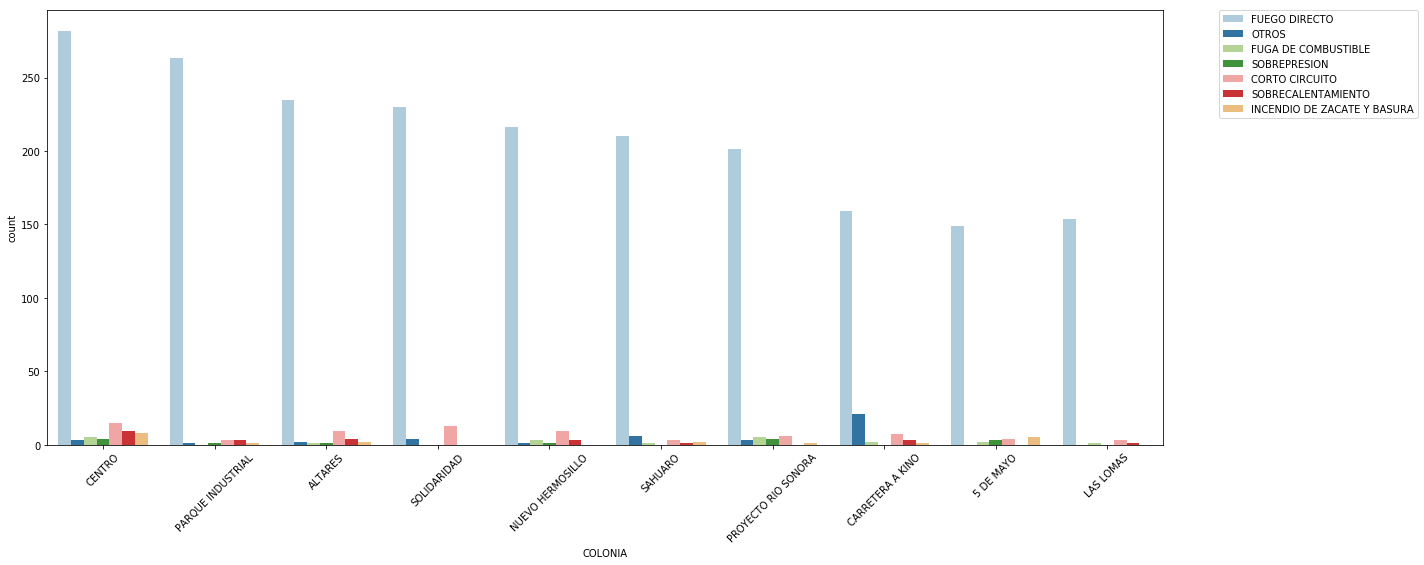

In [27]:
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g2 = sns.countplot(x='COLONIA', data = sbh_incendios_causas,order=pd.value_counts(sbh_incendios_causas['COLONIA']).iloc[1:11].index, palette = 'Paired', hue='CAUSA') 
#g2 = sns.countplot(x='CAUSA', data = sbh_incendios, order = pd.value_counts(sbh_incendios['CAUSA']).iloc[:10].index, palette = 'Paired') 
loc, labels = plt.xticks()
g2.set_xticklabels(labels, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# EJERCICIO 4 TIEMPO DE LLEGADA (SALIDA-LLEGADA)

In [28]:
#Verificacion de conversion de operacion artimetica de 2 conversiones de string a datetype
pd.to_datetime(sbh_incendios['LLEGADA'][0], dayfirst =True) - pd.to_datetime(sbh_incendios['SALIDA'][0], dayfirst =True)

Timedelta('0 days 00:09:00')

In [0]:
#Backup de dataset
sbh_incendios_tiempo = sbh_incendios

In [30]:
#Exploracion de datos
sbh_incendios_tiempo.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1


In [31]:
#Agregar 2 columnas nuevas en base al experimento de las celdas ateriores, eliminacion de las dos celdas utilizadas
sbh_incendios_tiempo['SALIDADT'] = pd.to_datetime(sbh_incendios_tiempo['SALIDA'], dayfirst = True)
sbh_incendios_tiempo['LLEGADADT'] = pd.to_datetime(sbh_incendios_tiempo['LLEGADA'], dayfirst = True)
sbh_incendios_tiempo.drop(['SALIDA', 'LLEGADA'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-co

In [32]:
sbh_incendios_tiempo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 12 columns):
FOLIO        13466 non-null object
TIPO         13466 non-null object
LUGAR        13457 non-null object
FECHA        13466 non-null object
CAUSA        13398 non-null object
COLONIA      13200 non-null object
ESTACION     13465 non-null float64
YEAR         13466 non-null int64
MONTH        13466 non-null int64
DAY          13466 non-null int64
SALIDADT     13466 non-null datetime64[ns]
LLEGADADT    13398 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 2.0+ MB


In [33]:
#int(sbh_incendios_tiempo['TIEMPO LLEGADA'].total_seconds() / 60)
sbh_incendios_tiempo['TIEMPO LLEGADA'] = pd.to_timedelta((sbh_incendios_tiempo['LLEGADADT'] - sbh_incendios['SALIDADT']))//(timedelta(minutes=1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
sbh_incendios_tiempo.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1,2016-01-01 00:29:00,2016-01-01 00:43:00,14.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0


In [35]:
sbh_incendios_tiempo['TIEMPO LLEGADA'].value_counts().iloc[:10]

7.0     1305
6.0     1279
5.0     1261
8.0     1215
9.0     1041
10.0    1001
4.0      931
11.0     756
3.0      665
12.0     630
Name: TIEMPO LLEGADA, dtype: int64

In [0]:
#Fijar valores de tiempos para poderlos graficar como hue

sbh_incendios_tiempo1 = sbh_incendios_tiempo.drop(sbh_incendios_tiempo[sbh_incendios_tiempo['TIEMPO LLEGADA'] <0].index)
sbh_incendios_tiempo1 = sbh_incendios_tiempo1.drop(sbh_incendios_tiempo1[sbh_incendios_tiempo1['TIEMPO LLEGADA'] >= 12].index)


In [37]:
sbh_incendios_tiempo1.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0
5,01012016-0053-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,FUEGO DIRECTO,SANTA FE,1.0,2016,1,1,2016-01-01 00:53:00,2016-01-01 00:58:00,5.0


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'SIN COLONIA'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'LAS LOMAS')]

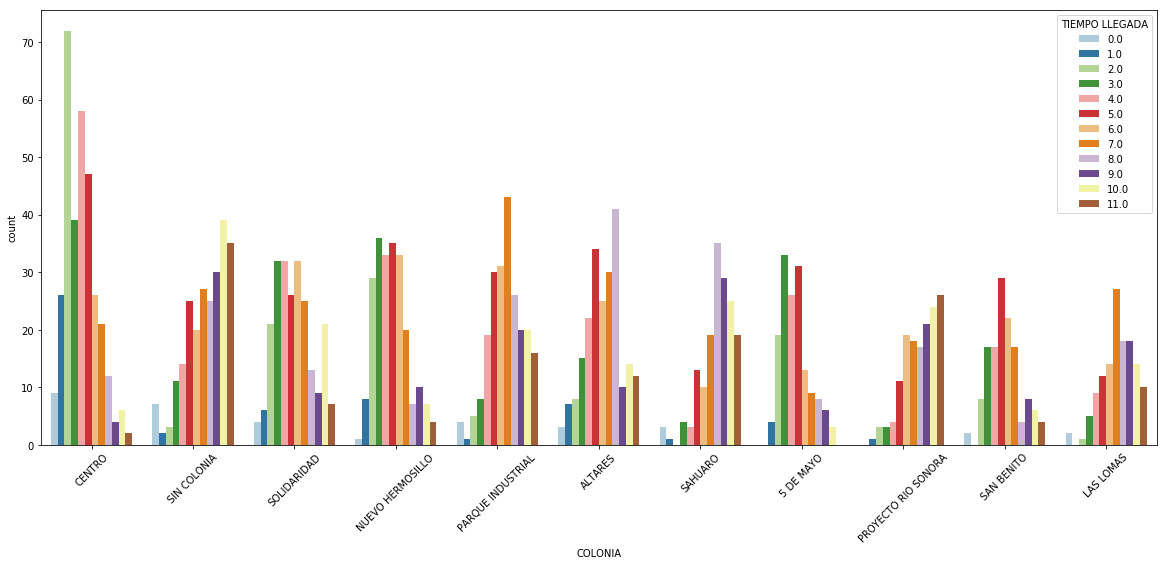

In [38]:
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g4 = sns.countplot(x='COLONIA', data = sbh_incendios_tiempo1,order=pd.value_counts(sbh_incendios_tiempo1['COLONIA']).iloc[0:11].index, palette = 'Paired', hue= 'TIEMPO LLEGADA') 
loc, labels = plt.xticks()
g4.set_xticklabels(labels, rotation=45)

# EJERCICIO 5 % DE LLAMADAS DE FALSA ALARMA

De las 15 colonias con mas incendios cuantas llamadas fueron falsas



In [39]:
#Comprobación que en la columna de causas contiene la palabra FALSA ALARMA
sbh_incendios['CAUSA'].str.contains(r'FALSA ALARMA').sum()

50

In [40]:
#Hago un nuevo DATAFRAME solamente para este ejercicio donde agrego una nueva columna que se agregara 0 o 1 si cumple la condicion
#Recordemos que esa funcion regresa FALSE o TRUE
#Agregue una nueva columna para poderla usar como HUE en la grafica
sbh_incendios_falsa_alarma = sbh_incendios
sbh_incendios_falsa_alarma['Falsa Alarma'] =sbh_incendios_falsa_alarma['CAUSA'].str.contains(r'FALSA ALARMA')
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [41]:
sbh_incendios_falsa_alarma.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA,Falsa Alarma
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0,False
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0,False
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1,2016-01-01 00:29:00,2016-01-01 00:43:00,14.0,False
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0,False
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0,False


In [42]:
sbh_incendios_falsa_alarma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 14 columns):
FOLIO             13466 non-null object
TIPO              13466 non-null object
LUGAR             13457 non-null object
FECHA             13466 non-null object
CAUSA             13398 non-null object
COLONIA           13200 non-null object
ESTACION          13465 non-null float64
YEAR              13466 non-null int64
MONTH             13466 non-null int64
DAY               13466 non-null int64
SALIDADT          13466 non-null datetime64[ns]
LLEGADADT         13398 non-null datetime64[ns]
TIEMPO LLEGADA    13398 non-null float64
Falsa Alarma      13398 non-null object
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 2.2+ MB


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS'),
 Text(0, 0, 'PALO VERDE'),
 Text(0, 0, 'LOS OLIVOS'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'SAN LUIS')]

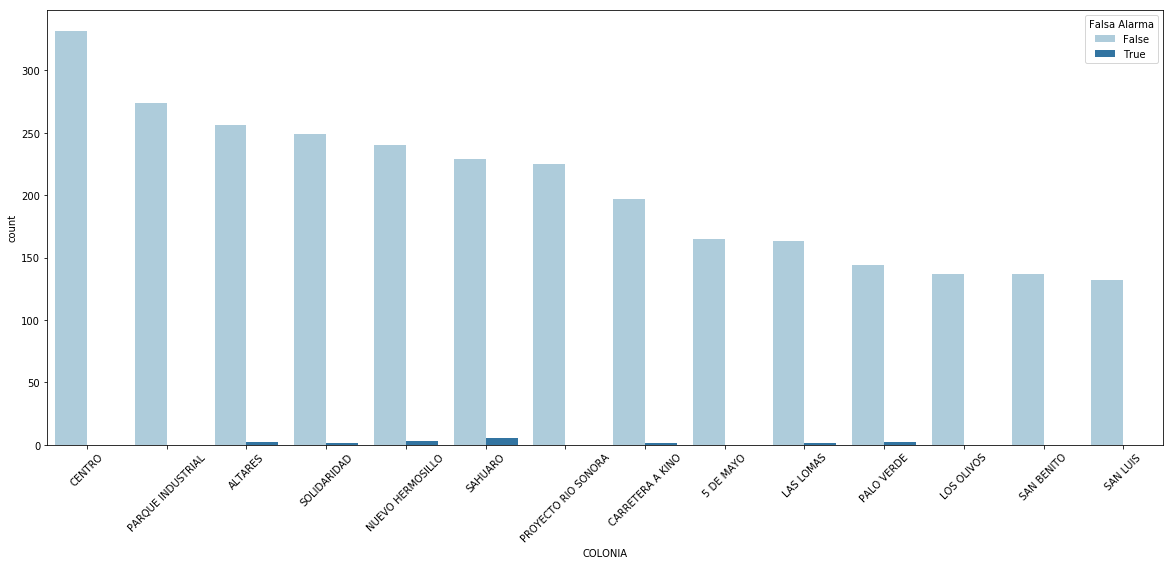

In [43]:
#Graficamos 
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g5 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:15].index, palette = 'Paired', hue = 'Falsa Alarma') 
loc, labels = plt.xticks()
g5.set_xticklabels(labels, rotation=45)

In [44]:
#(Numero de llamadas Falsas / Total de llamadas) *100

Porcentaje_Falsas_Alarmas = (sbh_incendios_falsa_alarma['Falsa Alarma'].sum()/len(sbh_incendios_falsa_alarma['Falsa Alarma']))*100
Porcentaje_Falsas_Alarmas

0.37130551017377095

# EJERCICIO 6 % DE INCENDIOS DE MALESA
Si analizamos un poco el dataset podemos ver que en las columas de TIPO y CAUSA hay strings de INCENDIO DE ZACATE y BASURA,
en este caso tomaremos la columna de TIPO

In [45]:
sbh_incendios['CAUSA'].value_counts()

FUEGO DIRECTO                           11626
CORTO CIRCUITO                            523
OTROS                                     272
SOBRECALENTAMIENTO                        200
INCENDIO DE ZACATE Y BASURA               150
FUGA DE COMBUSTIBLE                       121
SOBREPRESION                               94
FUGA DE GAS LP Y/O GAS NATURAL             73
FUGA DE GAS                                61
SOBRECARGA                                 56
FALSA ALARMA                               50
CHOQUE                                     27
ENJAMBRE DE ABEJAS                         22
MAL ESTADO DEL CILINDRO Y/O VALVULAS       15
INCENDIO DE CASA DE MATERIAL               15
INCENDIO DE VEHÍCULO                       13
CONATO DE INCENDIO                         12
FALSA EXPLOSIÓN                            11
DERRAME DE COMBUSTIBLE                     11
COBERTURA DE SEGURIDAD                      8
INCENDIO DE CASA DE CARTÓN                  7
FENOMENO NATURAL                  

In [46]:
#Comprobación que en la columna de causas contiene la palabra INCENDIO DE ZACATE Y BASURA
sbh_incendios['CAUSA'].str.contains(r'INCENDIO DE ZACATE Y BASURA').sum()

150

In [47]:
#El string MALEZA no viene en el dataset, lo tomares como INCENDIO DE ZACATE Y BASURA 
sbh_incendios['TIPO'].value_counts()

INCENDIO DE ZACATE Y BASURA        9434
INCENDIO DE CASA DE MATERIAL       1926
INCENDIO DE VEHÍCULO               1059
INCENDIO DE CASA DE CARTÓN          450
INCENDIO DE COMERCIO                322
INCENDIO DE INSTALACIÓN PÚBLICA     135
CONATO DE INCENDIO                   76
INCENDIO DE INDUSTRIA                34
INCENDIO DE ALMACEN                  30
Name: TIPO, dtype: int64

In [48]:
#Comprobación que en la columna de causas contiene la palabra INCENDIO DE ZACATE Y BASURA
sbh_incendios['TIPO'].str.contains(r'INCENDIO DE ZACATE Y BASURA').sum()

9434

In [49]:
#Hago un nuevo DATAFRAME solamente para este ejercicio donde agrego una nueva columna que se agregara 0 o 1 si cumple la condicion
#Recordemos que esa funcion regresa FALSE o TRUE
#Agregue una nueva columna para poderla usar como HUE en la grafica
sbh_incendios_maleza = sbh_incendios
sbh_incendios_maleza['Maleza'] =sbh_incendios_maleza['TIPO'].str.contains(r'INCENDIO DE ZACATE Y BASURA')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
sbh_incendios_maleza.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,SALIDADT,LLEGADADT,TIEMPO LLEGADA,Falsa Alarma,Maleza
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1,2016-01-01 00:07:00,2016-01-01 00:16:00,9.0,False,True
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1,2016-01-01 00:22:00,2016-01-01 00:32:00,10.0,False,True
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1,2016-01-01 00:29:00,2016-01-01 00:43:00,14.0,False,False
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1,2016-01-01 00:39:00,2016-01-01 00:43:00,4.0,False,True
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1,2016-01-01 00:51:00,2016-01-01 00:59:00,8.0,False,True


In [51]:
sbh_incendios_maleza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13466 entries, 0 to 22995
Data columns (total 15 columns):
FOLIO             13466 non-null object
TIPO              13466 non-null object
LUGAR             13457 non-null object
FECHA             13466 non-null object
CAUSA             13398 non-null object
COLONIA           13200 non-null object
ESTACION          13465 non-null float64
YEAR              13466 non-null int64
MONTH             13466 non-null int64
DAY               13466 non-null int64
SALIDADT          13466 non-null datetime64[ns]
LLEGADADT         13398 non-null datetime64[ns]
TIEMPO LLEGADA    13398 non-null float64
Falsa Alarma      13398 non-null object
Maleza            13466 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 2.2+ MB


[Text(0, 0, 'CENTRO'),
 Text(0, 0, 'PARQUE INDUSTRIAL'),
 Text(0, 0, 'ALTARES'),
 Text(0, 0, 'SOLIDARIDAD'),
 Text(0, 0, 'NUEVO HERMOSILLO'),
 Text(0, 0, 'SAHUARO'),
 Text(0, 0, 'PROYECTO RIO SONORA'),
 Text(0, 0, 'CARRETERA A KINO'),
 Text(0, 0, '5 DE MAYO'),
 Text(0, 0, 'LAS LOMAS'),
 Text(0, 0, 'PALO VERDE'),
 Text(0, 0, 'LOS OLIVOS'),
 Text(0, 0, 'SAN BENITO'),
 Text(0, 0, 'SAN LUIS')]

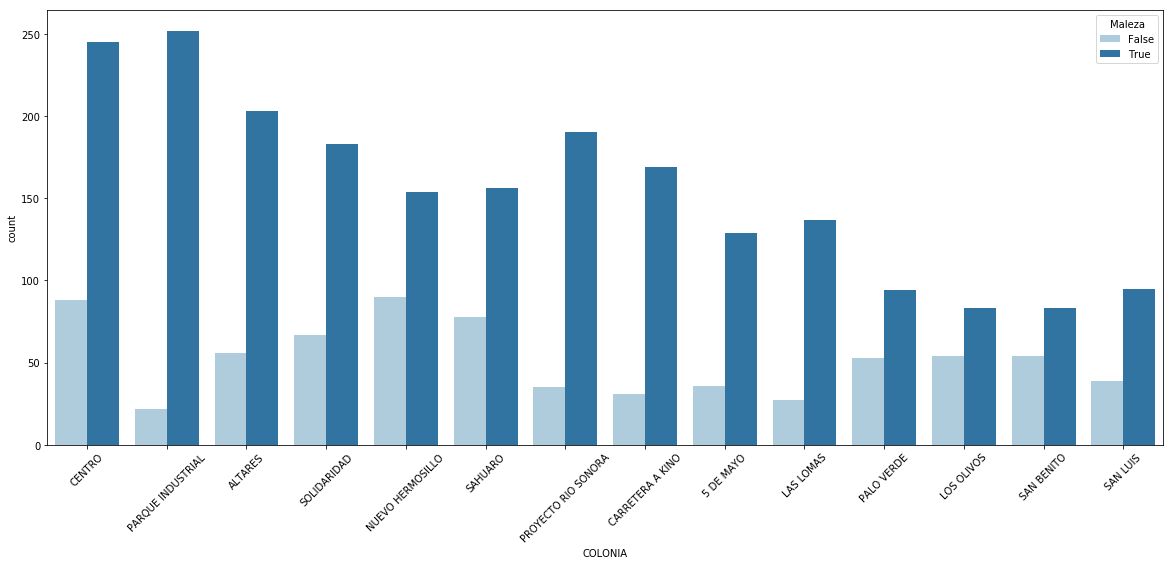

In [52]:
#Graficamos 
plt.figure(figsize=(20,8)) #Crea el espacio de memoria para la grafica y le asigna un tamaño en especifico

# La grafica se define como g solo para poderle asignar que las etiquetas en el eje x esten a 45 grados 
g6 = sns.countplot(x='COLONIA', data = sbh_incendios,order=pd.value_counts(sbh_incendios['COLONIA']).iloc[1:15].index, palette = 'Paired', hue = 'Maleza') 
loc, labels = plt.xticks()
g6.set_xticklabels(labels, rotation=45)

In [0]:
Porcentaje_Maleza = (sbh_incendios_maleza['Maleza'].sum()/len(sbh_incendios_maleza['TIPO']))*100
Porcentaje_Maleza

70.0579236595871

# EJERCICIO 7. Posibilidad de un incendio por colonia con random forest

In [0]:
SBH_COPY = SBH.copy()

In [0]:
sbh_incendios.drop(['TIEMPO LLEGADA', 'Falsa Alarma', 'Maleza'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
sbh_incendios.drop(['SALIDADT', 'LLEGADADT'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [0]:
#['Tipo'] == '#N/A'] == 0
#['Tipo'] == 'ATENCION PRE HOSPITALARIA'] == 1
#['Tipo'] == 'COBERTURA DE SEGURIDAD'] == 2
#['Tipo'] == 'CONATO DE INCENDIO'] == 3
#['Tipo'] == 'CORTO CIRCUITO'] == 4
#['Tipo'] == 'DAÑOS A INSTALACIONES PÚBLICAS'] == 5
#['Tipo'] == 'DERRAME DE COMBUSTIBLE'] == 6
#['Tipo'] == 'DERRUMBES'] == 7
#['Tipo'] == 'ENJAMBRE DE ABEJAS'] == 8
#['Tipo'] == 'EXPLOSIONES'] == 9
#['Tipo'] == 'FALSA ALARMA'] == 10
#['Tipo'] == 'FUGA DE GAS LP Y/O GAS NATURAL'] == 11
#['Tipo'] == 'INCENDIO DE ALMACEN'] == 12
#['Tipo'] == 'INCENDIO DE CASA DE CARTÓN'] == 13
#['Tipo'] == 'INCENDIO DE CASA DE MATERIAL'] == 14
#['Tipo'] == 'INCENDIO DE COMERCIO'] == 15
#['Tipo'] == 'INCENDIO DE INDUSTRIA'] == 16
#['Tipo'] == 'INCENDIO DE INSTALACIÓN PÚBLICA'] == 17
#['Tipo'] == 'INCENDIO DE VEHICULO'] == 18
#['Tipo'] == 'INCENDIO DE ZACATE Y BASURA'] == 19
#['Tipo'] == 'INCIDENTE CON MATERIAL PELIGROSO'] == 20
#['Tipo'] == 'INUNDACIÓN'] == 21
#['Tipo'] == 'OLOR A HIDROCARBURO'] == 22
#['Tipo'] == 'OTROS'] == 23
#['Tipo'] == 'REMOJAR'] == 24
#['Tipo'] == 'RESCATE'] == 25
#['Tipo'] == 'RETIRO DE ANIMAL'] == 26
#['Tipo'] == 'SERVICIO ESPECIAL'] == 27
#['Tipo'] == 'SIMULACRO'] == 28

SBH['TIPO'] = pd.factorize(SBH['TIPO'], sort=True)[0] + 1

In [0]:
SBH['']

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION
0,01012016-0007-INZB-2A,19,COMERCIO,01-01-16,01-01-16 0:07,01-01-16 0:16,FUEGO DIRECTO,SIN COLONIA,2.0
1,01012016-0022-INZB-1A,19,CASA,01-01-16,01-01-16 0:22,01-01-16 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0
2,01012016-0029-IDCM-1A,14,CASA,01-01-16,01-01-16 0:29,01-01-16 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0
3,01012016-0039-INZB-2A,19,VEHICULO,01-01-16,01-01-16 0:39,01-01-16 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0
4,01012016-0051-INZB-2A,19,CASA,01-01-16,01-01-16 0:51,01-01-16 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0


In [0]:
SBH['COLONIA'] = pd.factorize(SBH['COLONIA'], sort=True)[0] + 1

In [0]:
SBH['COLONIA'] = pd.factorize(SBH['COLONIA'], sort=True)[0] + 1

In [0]:
sbh_incendiosCOPY['CAUSA'] = pd.factorize(sbh_incendiosCOPY['CAUSA'], sort=True)[0] + 1

In [0]:
sbh_incendiosCOPY['LUGAR'] = pd.factorize(sbh_incendiosCOPY['LUGAR'], sort=True)[0] + 1
sbh_incendiosCOPY.drop(['FOLIO', 'FECHA'], axis = 1, inplace =  True)
sbh_incendiosCOPY

,TIPO,LUGAR,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,9,7,12,526,2.0,2016,1,1
1,9,6,12,299,1.0,2016,1,1
2,4,6,24,447,1.0,2016,1,1
3,9,12,12,346,2.0,2016,1,1
4,9,6,12,331,2.0,2016,1,1
5,4,6,12,518,1.0,2016,1,1
6,9,11,12,544,1.0,2016,1,1
7,4,6,12,601,2.0,2016,1,1
9,9,11,12,560,3.0,2016,1,1
10,8,12,12,110,1.0,2016,1,1


In [0]:
sbh_incendiosCOPY

,TIPO,LUGAR,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,9,7,12,526,2.0,2016,1,1
1,9,6,12,299,1.0,2016,1,1
2,4,6,24,447,1.0,2016,1,1
3,9,12,12,346,2.0,2016,1,1
4,9,6,12,331,2.0,2016,1,1
5,4,6,12,518,1.0,2016,1,1
6,9,11,12,544,1.0,2016,1,1
7,4,6,12,601,2.0,2016,1,1
9,9,11,12,560,3.0,2016,1,1
10,8,12,12,110,1.0,2016,1,1


In [0]:
sbh_incendios.head()

,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,9,COMERCIO,01-01-16,FUEGO DIRECTO,SIN COLONIA,2.0,2016,1,1
1,01012016-0022-INZB-1A,9,CASA,01-01-16,FUEGO DIRECTO,LOMAS DE MADRID,1.0,2016,1,1
2,01012016-0029-IDCM-1A,4,CASA,01-01-16,OTROS,PUERTA REAL RESIDENCIAL,1.0,2016,1,1
3,01012016-0039-INZB-2A,9,VEHICULO,01-01-16,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,2016,1,1
4,01012016-0051-INZB-2A,9,CASA,01-01-16,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,2016,1,1


In [0]:
sbh_incendios['COLONIA'] = pd.factorize(sbh_incendios['COLONIA'], sort=True)[0] + 1
sbh_incendios['CAUSA'] = pd.factorize(sbh_incendios['CAUSA'], sort=True)[0] + 1
sbh_incendios

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,9,COMERCIO,01-01-16,12,525,2.0,2016,1,1
1,01012016-0022-INZB-1A,9,CASA,01-01-16,12,298,1.0,2016,1,1
2,01012016-0029-IDCM-1A,4,CASA,01-01-16,24,446,1.0,2016,1,1
3,01012016-0039-INZB-2A,9,VEHICULO,01-01-16,12,345,2.0,2016,1,1
4,01012016-0051-INZB-2A,9,CASA,01-01-16,12,330,2.0,2016,1,1
5,01012016-0053-IDCM-1A,4,CASA,01-01-16,12,517,1.0,2016,1,1
6,01012016-0058-INZB-1A,9,LOTE BALDIO,01-01-16,12,543,1.0,2016,1,1
7,01012016-0115-IDCM-2A,4,CASA,01-01-16,12,600,2.0,2016,1,1
9,01012016-0415-INZB-3A,9,LOTE BALDIO,01-01-16,12,559,3.0,2016,1,1
10,01012016-0515-INDV-1A,8,VEHICULO,01-01-16,12,109,1.0,2016,1,1


In [0]:
sbh_incendios['LUGAR'] = pd.factorize(sbh_incendiosCOPY['LUGAR'], sort=True)[0] + 1
sbh_incendios

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY
0,01012016-0007-INZB-2A,9,7,01-01-16,12,525,2.0,2016,1,1
1,01012016-0022-INZB-1A,9,6,01-01-16,12,298,1.0,2016,1,1
2,01012016-0029-IDCM-1A,4,6,01-01-16,24,446,1.0,2016,1,1
3,01012016-0039-INZB-2A,9,12,01-01-16,12,345,2.0,2016,1,1
4,01012016-0051-INZB-2A,9,6,01-01-16,12,330,2.0,2016,1,1
5,01012016-0053-IDCM-1A,4,6,01-01-16,12,517,1.0,2016,1,1
6,01012016-0058-INZB-1A,9,11,01-01-16,12,543,1.0,2016,1,1
7,01012016-0115-IDCM-2A,4,6,01-01-16,12,600,2.0,2016,1,1
9,01012016-0415-INZB-3A,9,11,01-01-16,12,559,3.0,2016,1,1
10,01012016-0515-INDV-1A,8,12,01-01-16,12,109,1.0,2016,1,1


In [0]:
#type(sbh_incendios['FECHA'][0])

pd.to_datetime(sbh_incendios['FECHA'], dayfirst =True)

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
5       2016-01-01
6       2016-01-01
7       2016-01-01
9       2016-01-01
10      2016-01-01
11      2016-01-01
15      2016-01-01
16      2016-01-01
19      2016-01-01
20      2016-01-01
22      2016-01-01
23      2016-01-01
25      2016-01-01
27      2016-01-01
28      2016-01-01
29      2016-01-01
30      2016-01-01
31      2016-01-01
32      2016-01-01
33      2016-01-01
34      2016-01-01
35      2016-01-01
36      2016-01-01
37      2016-01-01
38      2016-01-01
           ...    
22948   2018-06-27
22950   2018-06-27
22951   2018-06-27
22953   2018-06-27
22954   2018-06-27
22956   2018-06-27
22957   2018-06-27
22960   2018-06-27
22961   2018-06-28
22962   2018-06-28
22963   2018-06-28
22968   2018-06-28
22969   2018-06-28
22970   2018-06-28
22971   2018-06-28
22972   2018-06-28
22973   2018-06-28
22974   2018-06-29
22975   2018-06-29
22976   2018-06-29
22977   2018-06-29
22978   2018

In [0]:
sbh_incendios['FECHADT'] = pd.to_datetime(sbh_incendios['FECHA'], dayfirst =True)
sbh_incendios.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,FOLIO,TIPO,LUGAR,FECHA,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,FECHADT
0,01012016-0007-INZB-2A,9,7,01-01-16,12,525,2.0,2016,1,1,2016-01-01
1,01012016-0022-INZB-1A,9,6,01-01-16,12,298,1.0,2016,1,1,2016-01-01
2,01012016-0029-IDCM-1A,4,6,01-01-16,24,446,1.0,2016,1,1,2016-01-01
3,01012016-0039-INZB-2A,9,12,01-01-16,12,345,2.0,2016,1,1,2016-01-01
4,01012016-0051-INZB-2A,9,6,01-01-16,12,330,2.0,2016,1,1,2016-01-01
5,01012016-0053-IDCM-1A,4,6,01-01-16,12,517,1.0,2016,1,1,2016-01-01
6,01012016-0058-INZB-1A,9,11,01-01-16,12,543,1.0,2016,1,1,2016-01-01
7,01012016-0115-IDCM-2A,4,6,01-01-16,12,600,2.0,2016,1,1,2016-01-01
9,01012016-0415-INZB-3A,9,11,01-01-16,12,559,3.0,2016,1,1,2016-01-01
10,01012016-0515-INDV-1A,8,12,01-01-16,12,109,1.0,2016,1,1,2016-01-01


In [0]:
sbh_incendios.drop('FECHA', axis = 1, inplace = True)
sbh_incendios

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,FOLIO,TIPO,LUGAR,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,FECHADT
0,01012016-0007-INZB-2A,9,7,12,525,2.0,2016,1,1,2016-01-01
1,01012016-0022-INZB-1A,9,6,12,298,1.0,2016,1,1,2016-01-01
2,01012016-0029-IDCM-1A,4,6,24,446,1.0,2016,1,1,2016-01-01
3,01012016-0039-INZB-2A,9,12,12,345,2.0,2016,1,1,2016-01-01
4,01012016-0051-INZB-2A,9,6,12,330,2.0,2016,1,1,2016-01-01
5,01012016-0053-IDCM-1A,4,6,12,517,1.0,2016,1,1,2016-01-01
6,01012016-0058-INZB-1A,9,11,12,543,1.0,2016,1,1,2016-01-01
7,01012016-0115-IDCM-2A,4,6,12,600,2.0,2016,1,1,2016-01-01
9,01012016-0415-INZB-3A,9,11,12,559,3.0,2016,1,1,2016-01-01
10,01012016-0515-INDV-1A,8,12,12,109,1.0,2016,1,1,2016-01-01


In [0]:
sbh_incendios.drop('FOLIO', axis =1 , inplace= True )
sbh_incendios.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,TIPO,LUGAR,CAUSA,COLONIA,ESTACION,YEAR,MONTH,DAY,FECHADT
0,9,7,12,525,2.0,2016,1,1,2016-01-01
1,9,6,12,298,1.0,2016,1,1,2016-01-01
2,4,6,24,446,1.0,2016,1,1,2016-01-01
3,9,12,12,345,2.0,2016,1,1,2016-01-01
4,9,6,12,330,2.0,2016,1,1,2016-01-01


In [0]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

#This is a import for classification_report, it will show the accuracy of the training model

from sklearn.metrics import classification_report, confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
sbh_incendios.isna().sum()

TIPO        0
LUGAR       0
CAUSA       0
COLONIA     0
ESTACION    1
YEAR        0
MONTH       0
DAY         0
FECHADT     0
dtype: int64

In [0]:
dtree = DecisionTreeClassifier()

In [0]:
X = sbh_incendios.drop(['FECHADT','ESTACION'], axis = 1)
y = sbh_incendios['FECHADT']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 42)

In [0]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
prediction = dtree.predict(X_test)

In [0]:
print(confusion_matrix(y_test, prediction))
print('\n')
print(classification_report(y_test, prediction))

[[19  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  2]]


                               precision    recall  f1-score   support

2016-01-01T00:00:00.000000000       1.00      1.00      1.00        19
2016-01-02T00:00:00.000000000       1.00      1.00      1.00         5
2016-01-03T00:00:00.000000000       1.00      1.00      1.00         2
2016-01-04T00:00:00.000000000       1.00      1.00      1.00         4
2016-01-05T00:00:00.000000000       1.00      1.00      1.00         2
2016-01-06T00:00:00.000000000       1.00      1.00      1.00         8
2016-01-07T00:00:00.000000000       1.00      1.00      1.00         2
2016-01-08T00:00:00.000000000       1.00      1.00      1.00         5
2016-01-09T00:00:00.000000000       1.00      1.00      1.00         4
2016-01-10T00:00:00.000000000       1.00      1.00      1.00         4
2016-01-11T00:00:00.000000000       1.00      1.00      1.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
